In [2]:
# Import all libraries
from sklearn import model_selection
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets as ds
import seaborn
import sklearn
from sklearn.model_selection import learning_curve

from sklearn.svm import SVC    
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold, train_test_split
from sklearn import model_selection, metrics, feature_selection, preprocessing, neighbors, svm, decomposition, preprocessing
from sklearn.impute import KNNImputer

from hn.load_data import load_data

In [27]:
# preprocessing function

def data_preprocessing(X_train, y_train, X_validation, y_validation):
    '''Data preprocessing'''

    # 1. Scaling 
    scaler = preprocessing.StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_validation_scaled = scaler.transform(X_validation)

    # 2. Feature selection/extraction
    pca = decomposition.PCA(n_components=30)
    pca.fit(X_train_scaled)
    X_train_pca = pca.transform(X_train_scaled)
    X_validation_pca = pca.transform(X_validation_scaled)

    return X_train_pca, X_validation_pca

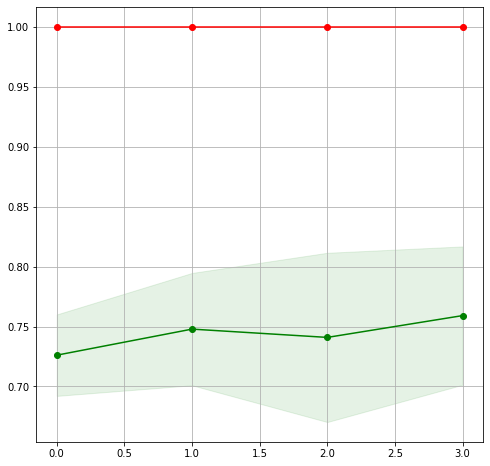

In [28]:
data = load_data()
y_labels = data['label']
del data['label']

y = sklearn.preprocessing.label_binarize(y_labels, ['T12', 'T34']) # 0 now stands for T12 and 1 for T34
y = [i[0] for i in y]
y = np.array(y)

cv_4fold = model_selection.StratifiedKFold(n_splits=4, shuffle=True)
split_X_train, split_X_test, split_y_train, split_y_test = train_test_split(data, y,
                                                    stratify=y, 
                                                    test_size=0.2)
all_train = []
all_test = []
all_c = []
all_kernel = []
all_gamma = []
for _ in range(0,10):
    train_scores = []
    test_scores = []
    for training_index, validation_index in cv_4fold.split(split_X_train, split_y_train):
        X_validation = split_X_train.iloc[validation_index]
        y_validation = split_y_train[validation_index]
        X_train = split_X_train.iloc[training_index]
        y_train = split_y_train[training_index]

        # Preprocessing 
        X_train_pca, X_validation_pca = data_preprocessing(X_train, y_train, X_validation, y_validation)

        # Modellen proberen 
        # grid_param =[{'kernel': ('linear','rbf'), 'gamma': [1e-04, 1e-03, 1e-02, 0.1, 1, 10],'C': [1e-04, 1e-03, 1e-02, 0.1, 1, 10]}]
        # grid_search=GridSearchCV(SVC(),grid_param,n_jobs=-1,verbose=2)
        # grid_search.fit(X_train_pca, y_train)

        # best_hyperparameters = grid_search.best_params_  

        # C = best_hyperparameters.get('C')
        # gamma = best_hyperparameters.get('gamma')
        # kernel = best_hyperparameters.get('kernel')
        # all_c.append(C)
        # all_kernel.append(kernel)
        # all_gamma.append(gamma)

        C = 10
        kernel = 'rbf'
        gamma = 0.01
        
        model=svm.SVC(kernel=kernel, C=C, gamma=gamma)
        model.fit(X_train_pca, y_train)
        score_train = model.score(X_train_pca, y_train)
        score_test = model.score(X_validation_pca, y_validation)

        train_scores.append(score_train)
        test_scores.append(score_test)

    all_train.append(train_scores)
    all_test.append(test_scores)

# Create numpy array of scores and calculate the mean and std
all_train = np.array(all_train)
all_test = np.array(all_test)

train_scores_mean = all_train.mean(axis=0)
train_scores_std = all_train.std(axis=0)

test_scores_mean = all_test.mean(axis=0)
test_scores_std = all_test.std(axis=0)

# Plot the mean scores and the std as shading
train_sizes = [0,1,2,3]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.grid()
ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
        label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
        label="Test score")
      

    


In [11]:
print(all_c)
print(all_kernel)
print(all_gamma)

def most_frequent(List): 
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num 

print(most_frequent(all_c))
print(most_frequent(all_kernel))
print(most_frequent(all_gamma))

[10, 1, 0.1, 1, 10, 1, 10, 1, 1, 0.01, 0.01, 10, 10, 0.01, 10, 10, 0.01, 1, 10, 0.01, 0.1, 10, 10, 1, 1, 10, 0.1, 10, 1, 10, 10, 10, 10, 10, 1, 10, 10, 0.1, 10, 1]
['rbf', 'linear', 'linear', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'linear', 'linear', 'rbf', 'rbf', 'linear', 'rbf', 'rbf', 'linear', 'rbf', 'rbf', 'linear', 'linear', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'linear', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'linear', 'rbf', 'rbf']
[0.001, 0.0001, 0.0001, 0.01, 0.01, 0.001, 0.01, 0.01, 0.01, 0.0001, 0.0001, 0.01, 0.01, 0.0001, 0.001, 0.01, 0.0001, 0.01, 0.01, 0.0001, 0.0001, 0.01, 0.001, 0.01, 0.001, 0.001, 0.0001, 0.001, 0.01, 0.001, 0.001, 0.01, 0.01, 0.001, 0.01, 0.01, 0.01, 0.0001, 0.01, 0.01]
10
rbf
0.01


0.5


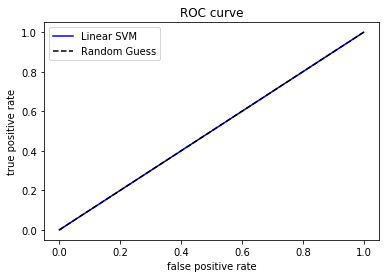

In [30]:
# Use the optimal parameters without any tuning to validate the optimal classifier
C = 0.1
kernel = 'rbf'
gamma = 0.01

model=svm.SVC(kernel=kernel, C=C, gamma=gamma, probability=True)

X_train_pca, X_test_pca = data_preprocessing(split_X_train, split_y_train, split_X_test, split_y_test)

model.fit(X_train_pca, split_y_train)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


scores = model.predict(X_test_pca)
auc = metrics.roc_auc_score(split_y_test, scores)

print(auc)

# print('AUC: {:.3f}'.format(roc_auc_score(split_y_test, decision_scores)))

# roc curve
plt.plot(fpr, tpr, "b", label='Linear SVM')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()
